In [20]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline

In [3]:
file = open('Vision_task_dataset_public/train_image.pkl', 'rb')
images = pickle.load(file)
file.close()


In [12]:
images=np.array(images)

In [13]:
images.shape

(8000, 784)

In [14]:
images

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
         0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212,
       205, 185, 179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        85,  76, 199, 225, 248, 255, 238, 226, 157,  68,  80,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  91,  69,  91, 201, 218, 225, 209, 158,  61,  93,  72,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  79,  89,  61,  59,  87, 108,  75,  56,  76,
        97,  73,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  75,  89,  80,  80,  67,  63,  73,
        83,  80,  96,  72,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  77,  88,  77,  8

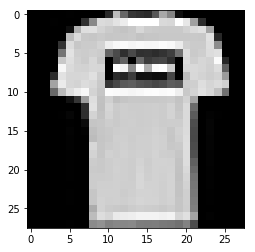

In [26]:
plt.imshow(images[0].reshape(28,28),cmap='gray')

In [27]:
images = images.reshape(-1,28,28,1)

In [28]:
images.shape

(8000, 28, 28, 1)

In [52]:
images = images/255

In [29]:
file = open('Vision_task_dataset_public/train_label.pkl', 'rb')
label = pickle.load(file)
file.close()

In [30]:
type(label)

list

In [31]:
label = np.array(label)

In [32]:
label.shape

(8000,)

In [33]:
np.unique(label)

array([0, 2, 3, 6])

In [34]:
label[label==2]=1
label[label==3]=2
label[label==6]=3

In [35]:
np.unique(label)

array([0, 1, 2, 3])

In [37]:
temp = np.zeros((label.size, label.max()+1))
temp[np.arange(label.size),label] = 1

In [40]:
label = temp
del(temp)

In [43]:
label.shape

(8000, 4)

In [45]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(images, label, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

In [54]:
X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape, y_val.shape

((5600, 28, 28, 1),
 (1200, 28, 28, 1),
 (1200, 28, 28, 1),
 (5600, 4),
 (1200, 4),
 (1200, 4))

In [99]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D, Dropout

In [84]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu',padding = 'same'))
model.add(Conv2D(32, kernel_size=3, activation='relu',padding = 'valid'))
model.add(Conv2D(32, kernel_size=3, activation='relu',padding = 'same'))
model.add(Conv2D(32, kernel_size=1, activation='relu',padding = 'valid'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 26, 26, 32)        18464     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 24, 24, 32)        1056      
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               4718848   
__________

In [86]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
model.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_val,y_val))

Train on 5600 samples, validate on 1200 samples
Epoch 1/10
5600/5600 [==============================] - 54s 10ms/step - loss: 0.6997 - acc: 0.7032 - val_loss: 0.5275 - val_acc: 0.7983
Epoch 2/10
5600/5600 [==============================] - 52s 9ms/step - loss: 0.4705 - acc: 0.8148 - val_loss: 0.4433 - val_acc: 0.8233
Epoch 3/10
5600/5600 [==============================] - 53s 9ms/step - loss: 0.3811 - acc: 0.8502 - val_loss: 0.3935 - val_acc: 0.8400
Epoch 4/10
5600/5600 [==============================] - 52s 9ms/step - loss: 0.3180 - acc: 0.8723 - val_loss: 0.3912 - val_acc: 0.8383
Epoch 5/10
5600/5600 [==============================] - 52s 9ms/step - loss: 0.2669 - acc: 0.8973 - val_loss: 0.3995 - val_acc: 0.8408
Epoch 6/10
5600/5600 [==============================] - 52s 9ms/step - loss: 0.2153 - acc: 0.9139 - val_loss: 0.3898 - val_acc: 0.8592
Epoch 7/10
5600/5600 [==============================] - 52s 9ms/step - loss: 0.1553 - acc: 0.9387 - val_loss: 0.4533 - val_acc: 0.8433
Epoch 

In [100]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(Dropout(0.4))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(4, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [101]:
hist= model1.fit(X_train,y_train,batch_size=64,epochs=50,validation_data=(X_val,y_val))

Train on 6400 samples, validate on 1200 samples
Epoch 1/50
6400/6400 [==============================] - 11s 2ms/step - loss: 0.9012 - acc: 0.5930 - val_loss: 0.6630 - val_acc: 0.6950
Epoch 2/50
6400/6400 [==============================] - 9s 1ms/step - loss: 0.6596 - acc: 0.7080 - val_loss: 0.5463 - val_acc: 0.7758
Epoch 3/50
6400/6400 [==============================] - 9s 1ms/step - loss: 0.5721 - acc: 0.7641 - val_loss: 0.4808 - val_acc: 0.8158
Epoch 4/50
6400/6400 [==============================] - 9s 1ms/step - loss: 0.5121 - acc: 0.7939 - val_loss: 0.4445 - val_acc: 0.8250
Epoch 5/50
6400/6400 [==============================] - 9s 1ms/step - loss: 0.4795 - acc: 0.8113 - val_loss: 0.4015 - val_acc: 0.8367
Epoch 6/50
6400/6400 [==============================] - 9s 1ms/step - loss: 0.4404 - acc: 0.8236 - val_loss: 0.3832 - val_acc: 0.8517
Epoch 7/50
6400/6400 [==============================] - 9s 1ms/step - loss: 0.4353 - acc: 0.8238 - val_loss: 0.3869 - val_acc: 0.8433
Epoch 8/50
64

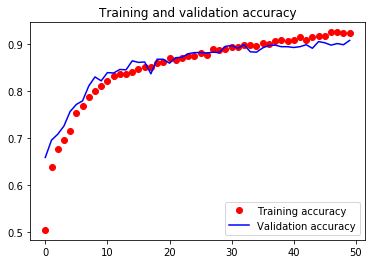

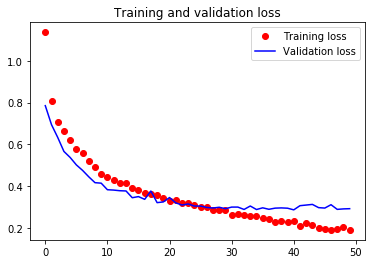

In [115]:
accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [120]:
score, acc = model1.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

1600/1600 [==============================] - 0s 297us/step
Test score: 0.43309426069259643
Test accuracy: 0.879375


In [111]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=3,
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28,28,1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, 3, activation='relu',kernel_initializer='he_normal'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(128, 3, activation='relu',kernel_initializer='he_normal'))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(512, activation='relu',kernel_initializer='he_normal'))
model2.add(Dropout(0.3))
model2.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model2.add(Dropout(0.3))
model2.add(Dense(4, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [113]:
hist= model2.fit(X_train,y_train,batch_size=64,epochs=50,validation_data=(X_val,y_val))

Train on 6400 samples, validate on 1200 samples
Epoch 1/50
6400/6400 [==============================] - 14s 2ms/step - loss: 1.1369 - acc: 0.5053 - val_loss: 0.7855 - val_acc: 0.6592
Epoch 2/50
6400/6400 [==============================] - 12s 2ms/step - loss: 0.8058 - acc: 0.6397 - val_loss: 0.6946 - val_acc: 0.6958
Epoch 3/50
6400/6400 [==============================] - 13s 2ms/step - loss: 0.7089 - acc: 0.6775 - val_loss: 0.6336 - val_acc: 0.7083
Epoch 4/50
6400/6400 [==============================] - 11s 2ms/step - loss: 0.6644 - acc: 0.6956 - val_loss: 0.5664 - val_acc: 0.7258
Epoch 5/50
6400/6400 [==============================] - 10s 2ms/step - loss: 0.6220 - acc: 0.7156 - val_loss: 0.5377 - val_acc: 0.7567
Epoch 6/50
6400/6400 [==============================] - 9s 1ms/step - loss: 0.5802 - acc: 0.7539 - val_loss: 0.5022 - val_acc: 0.7717
Epoch 7/50
6400/6400 [==============================] - 8s 1ms/step - loss: 0.5591 - acc: 0.7686 - val_loss: 0.4758 - val_acc: 0.7792
Epoch 8/5

In [121]:
score, acc = model2.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

1600/1600 [==============================] - 1s 334us/step
Test score: 0.3944107460975647
Test accuracy: 0.871875


In [122]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=True)
datagen.fit(X_train)

In [127]:
model1.fit_generator(datagen.flow(X_train, y_train, batch_size=32),steps_per_epoch=len(X_train) / 32,validation_data=datagen.flow(X_val, y_val, batch_size=32), epochs=50, validation_steps=len(X_val) / 32)

Epoch 1/50
200/200 [==============================] - 10s 48ms/step - loss: 0.7090 - acc: 0.7239 - val_loss: 12.2632 - val_acc: 0.2392
Epoch 2/50
200/200 [==============================] - 10s 49ms/step - loss: 0.7052 - acc: 0.7264 - val_loss: 12.2632 - val_acc: 0.2392
Epoch 3/50
200/200 [==============================] - 9s 47ms/step - loss: 0.6908 - acc: 0.7239 - val_loss: 12.2632 - val_acc: 0.2392
Epoch 4/50
200/200 [==============================] - 10s 49ms/step - loss: 0.6992 - acc: 0.7239 - val_loss: 12.2632 - val_acc: 0.2392
Epoch 5/50
200/200 [==============================] - 10s 48ms/step - loss: 0.6755 - acc: 0.7375 - val_loss: 12.2632 - val_acc: 0.2392
Epoch 6/50
200/200 [==============================] - 10s 49ms/step - loss: 0.6746 - acc: 0.7416 - val_loss: 12.2632 - val_acc: 0.2392
Epoch 7/50
200/200 [==============================] - 10s 49ms/step - loss: 0.6730 - acc: 0.7406 - val_loss: 12.2632 - val_acc: 0.2392
Epoch 8/50
200/200 [==============================] - 10